In [1]:
from torchvision import datasets
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize, Lambda, transforms
from torch.utils.data import DataLoader, Subset, Dataset
import sys
import os
sys.path.append(os.path.dirname(sys.path[0]))
import utils.misc as misc
import pandas as pd
import torch
import random
import numpy as np
from dataset import MNIST_loaders
import matplotlib.pyplot as plt

In [6]:
train, test = MNIST_loaders(batch_size=10000, num_subsets=2, transform=None, fixed_number = True, amount = 20000)
data = train[0]
dataiter = iter(data)
images, labels = next(dataiter)

In [7]:
reshaped_images = images.reshape(-1, 28, 28)

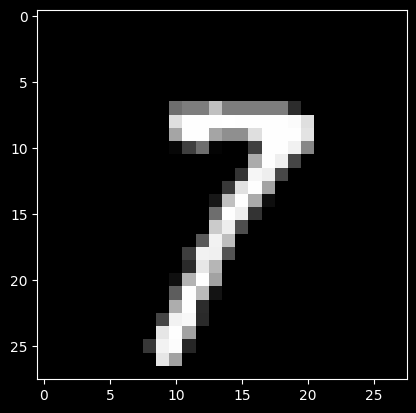

In [9]:
plt.imshow(reshaped_images[8], cmap='gray')
plt.show()